<center>
<a href="http://uf-mi.u-bordeaux.fr/MSS/" ><img src="https://www.math.u-bordeaux.fr/~jbigot/Site/Enseignement_files/logo_MAS_MSS.jpg" style="float:left; max-width: 400px; display: inline" alt="INSA"/></a>

<a href="https://www.math.u-bordeaux.fr/" ><img src="https://www.math.u-bordeaux.fr/~jbigot/Site/Enseignement_files/LogoIMB.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> UE M2 Master MAS-MSS et CIMI ISI Projet Données Massives

# Classification d'images avec des réseaux de neurons profonds
<a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> &<a href="https://pytorch.org/">
    <img src="https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/pytorch-logo-dark.png" style="width: 100px; height: 100px; transform: scale(0.1);" alt="PyTorch"/>
</a>








**Résumé**: Ce calepin propose l'utilisation des librairies `PyTorch`  pour l'implémentation de modèles de réseaux de neurones profond pour une tâche d'apprentissage supervisé à $K=2$ en traitement d'images.

Vous allez devoir implémenter ces algorithmes en grande dimension sur un problème de classification d'images couleurs de taille $128 \times 128$ (présence ou non d'une éolienne dans des images satellites) et comparer leurs performances.

Les données sont partagées en un ensemble d'apprentissage où pour chaque image vous connaissez sa classe (présence ou non d'une éolienne) et un ensemble de test (ensemble d'images non-labellisée) surlequel seront evaluées les performances de votre meilleure méthode à la fin du projet.

Vous pouvez télécharger les données liées à ce projet dans les liens suivants :

1) Petit jeu de données (Small) :

https://filesender.renater.fr/?s=download&token=b2e4ab1e-8df6-41f0-ae54-8bb33bf60c4a

2) Jeu de données complet :

https://filesender.renater.fr/?s=download&token=9aaf1fac-3265-41a1-9fcf-a6bfe586b14a



Les attendus du projet sont :

- un court compte-rendu qui présente le meilleur modèle que vous avez obtenu et sa validation à l'aide des données d'apprentissage,

- un fichier .csv qui contient les prédictions des classes pour les images de l'ensemble test à partir duquel un taux de bonne classification sera calculé en fin de projet.

Dans ce travail, vous pouvez créer vos propres architectures de réseaux de neurones, mais également utiliser des modèles pré-entraînés sur d'autres bases de données et les adapter à la problématique de classification d'images de ce projet. En PyTorch, vous pouvez utiliser des modèles pré-entraînés à partir de la bibliothèque torchvision.models, tels que ResNet, VGG, DenseNet, ou encore EfficientNet, et les ajuster (fine-tuning) à vos propres données. Un tutoriel sur l'apprentissage par transfert en PyTorch est disponible ici :

https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

## Prise en main des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


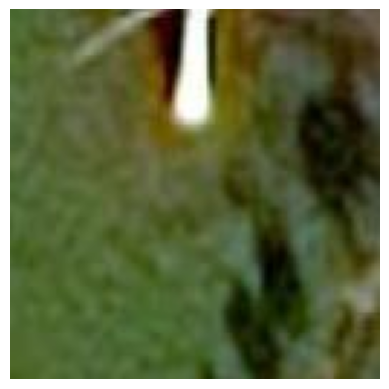

In [ ]:
# Visualisation des données avec PyTorch
from PIL import Image
import matplotlib.pyplot as plt

# Chemin d'accès aux données dans Google Drive
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Projet_1_Defi_IA'

# Chargement de l'image avec PIL
img_path = data_dir + '/train/target/C254372785.jpg'
img = Image.open(img_path)

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Masquer les axes
plt.show()

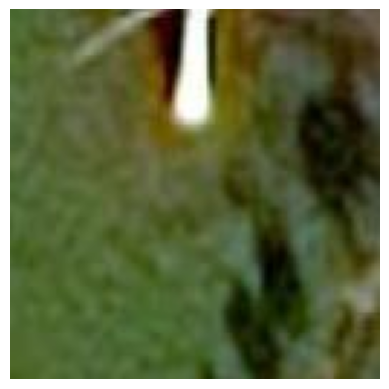

In [ ]:
# Visualisation des données avec PyTorch
from PIL import Image
import matplotlib.pyplot as plt

# Chemin d'accès aux données dans Google Drive
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Projet_1_Defi_IA'

# Chargement de l'image avec PIL
img_path = data_dir + '/train/target/C254372785.jpg'
img = Image.open(img_path)

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Masquer les axes
plt.show()


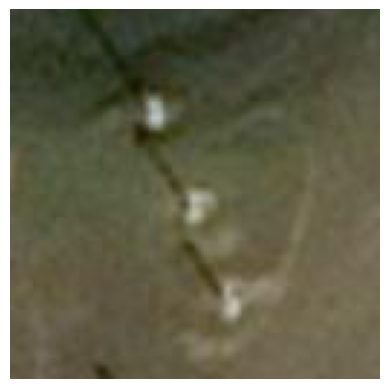

Taille de l'image (other):  torch.Size([3, 128, 128])


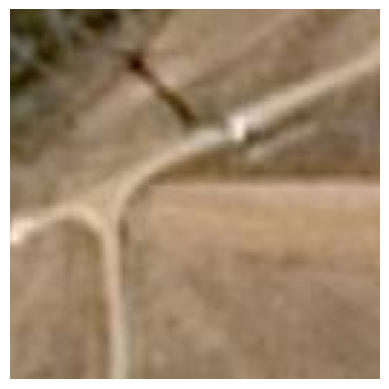

Taille de l'image (test):  torch.Size([3, 128, 128])
Premier canal de l'image (tensor): tensor([[0.2549, 0.2549, 0.2431,  ..., 0.2431, 0.2588, 0.2745],
        [0.2353, 0.2392, 0.2275,  ..., 0.2588, 0.2667, 0.2745],
        [0.2157, 0.2196, 0.2118,  ..., 0.2863, 0.2902, 0.2863],
        ...,
        [0.3608, 0.3647, 0.3686,  ..., 0.4588, 0.4627, 0.4667],
        [0.3804, 0.3804, 0.3765,  ..., 0.4510, 0.4549, 0.4588],
        [0.4039, 0.3961, 0.3843,  ..., 0.4392, 0.4431, 0.4431]])


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Définir la transformation ToTensor
to_tensor = transforms.ToTensor()

# Chemin d'accès aux données
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Projet_1_Defi_IA'

# Visualiser une autre image
img_other_path = data_dir + '/train/target/C258215971.jpg'
img_other = Image.open(img_other_path)
img_other_tensor = to_tensor(img_other)

# Afficher l'autre image et sa taille
plt.imshow(img_other)
plt.axis('off')
plt.show()
print("Taille de l'image (other): ", img_other_tensor.shape)

# Charger une image du jeu de test
img_test_path = data_dir + '/test/test_subfolder/10.jpg'  # Correction du chemin
img_test = Image.open(img_test_path)
img_test_tensor = to_tensor(img_test)

# Afficher l'image test et sa taille
plt.imshow(img_test)
plt.axis('off')
plt.show()
print("Taille de l'image (test): ", img_test_tensor.shape)

# Affichage du premier canal de l'image "other" (le canal rouge dans RGB)
print("Premier canal de l'image (tensor):", img_other_tensor[0, :, :])

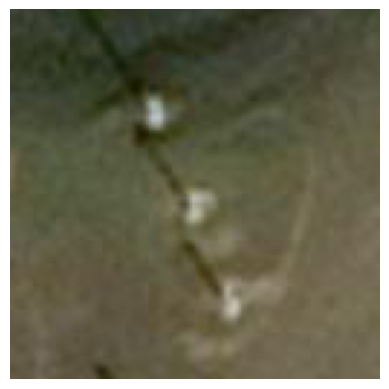

Taille de l'image (other):  torch.Size([3, 128, 128])


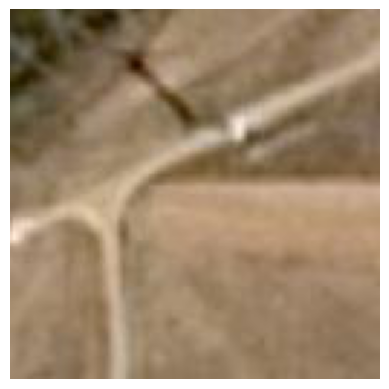

Taille de l'image (test):  torch.Size([3, 128, 128])
Premier canal de l'image (tensor): tensor([[0.2549, 0.2549, 0.2431,  ..., 0.2431, 0.2588, 0.2745],
        [0.2353, 0.2392, 0.2275,  ..., 0.2588, 0.2667, 0.2745],
        [0.2157, 0.2196, 0.2118,  ..., 0.2863, 0.2902, 0.2863],
        ...,
        [0.3608, 0.3647, 0.3686,  ..., 0.4588, 0.4627, 0.4667],
        [0.3804, 0.3804, 0.3765,  ..., 0.4510, 0.4549, 0.4588],
        [0.4039, 0.3961, 0.3843,  ..., 0.4392, 0.4431, 0.4431]])


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Définir la transformation ToTensor
to_tensor = transforms.ToTensor()

# Chemin d'accès aux données
data_dir = 'Data_Projet_1_Defi_IA'

# Visualiser une autre image
img_other_path = data_dir + '/train/target/C258215971.jpg'
img_other = Image.open(img_other_path)
img_other_tensor = to_tensor(img_other)

# Afficher l'autre image et sa taille
plt.imshow(img_other)
plt.axis('off')
plt.show()
print("Taille de l'image (other): ", img_other_tensor.shape)

# Charger une image du jeu de test
img_test_path = data_dir + '/test/test_subfolder/10.jpg'  # Correction du chemin
img_test = Image.open(img_test_path)
img_test_tensor = to_tensor(img_test)

# Afficher l'image test et sa taille
plt.imshow(img_test)
plt.axis('off')
plt.show()
print("Taille de l'image (test): ", img_test_tensor.shape)

# Affichage du premier canal de l'image "other" (le canal rouge dans RGB)
print("Premier canal de l'image (tensor):", img_other_tensor[0, :, :])


In [ ]:
# Transformer l'image en tenseur PyTorch (déjà fait précédemment)
img_tensor = to_tensor(img)

# Afficher la taille de l'image sous forme de tenseur
print("Taille de l'image : ", img_tensor.shape)

# Afficher le deuxième canal (équivalent de x[:,:,1] en numpy)
print("Deuxième canal de l'image :", img_tensor[1, :, :])

Taille de l'image :  torch.Size([3, 128, 128])
Deuxième canal de l'image : tensor([[0.4039, 0.4039, 0.4078,  ..., 0.3412, 0.3490, 0.3490],
        [0.4078, 0.4039, 0.4039,  ..., 0.3569, 0.3608, 0.3608],
        [0.4118, 0.4078, 0.4039,  ..., 0.3647, 0.3608, 0.3569],
        ...,
        [0.3843, 0.3843, 0.3882,  ..., 0.3647, 0.3451, 0.3373],
        [0.3686, 0.3725, 0.3765,  ..., 0.3686, 0.3490, 0.3412],
        [0.3608, 0.3608, 0.3686,  ..., 0.3765, 0.3569, 0.3451]])


## Réseaux de neurones

Nous avons choisi les paramètres de chaque modèle en effectuant des essais sur le jeu de données Small car nous n'avions pas de GPU à disposition et les méthodes cloud se sont révélées instables au cours du temps. \
Une fois les paramètres choisis en fonction des performances des modèles sur le jeu de données Small, nous avons entraîné chaque modèle sur le jeu de données entier. \
Enfin, nous avons pu comparer leur performance.

In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings("ignore")

In [ ]:
# Installer EfficientNet s'il le faut
pip install efficientnet_pytorch

In [26]:
# Importation de librairies
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
from efficientnet_pytorch import EfficientNet
from PIL import Image
import matplotlib.pyplot as plt

cudnn.benchmark = True
plt.ion()   # interactive mode

### Modèle 1

In [ ]:
# Paramètres
nb_classes = 2
batch_size = 100
img_width = 128
img_height = 128

# Chemin d'accès aux données
data_dir = 'Data_Projet_1_Defi_IA'

# Définir les transformations pour normaliser les images
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((img_width, img_height)),  # Redimensionner les images
        transforms.ToTensor(),  # Convertir les images en tenseur PyTorch
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normaliser les images
    ]),
    'val': transforms.Compose([
        transforms.Resize((img_width, img_height)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Charger les ensembles d'entraînement et de validation
train_dataset = datasets.ImageFolder(data_dir + '/train', transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(data_dir + '/validation', transform=data_transforms['val'])

# Créer les DataLoaders pour charger les images par lots
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Obtenir les classes
class_names = train_dataset.classes
print(f"Classes: {class_names}")

Classes: ['other', 'target']


In [ ]:
val_dataset

Dataset ImageFolder
    Number of datapoints: 5000
    Root location: Data_Projet_1_Defi_IA/validation
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
# Définition d'un réseau de neurones basique en PyTorch sans Softmax
class BasicModel(nn.Module):
    def __init__(self):
        super(BasicModel, self).__init__()
        # Couches de convolution
        # qui vont permettre de détecter la forme, les bords et les motifs un peu plus complexe
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Pooling pour réduire les dimensions
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dropout pour la régularisation
        self.dropout = nn.Dropout(0.5)

        # Couches entièrement connectées
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * (img_width // 8) * (img_height // 8), 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2) # Classification binaire

    def forward(self, x):
        # Bloc de convolutions + pooling + relu
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))

        # Aplatissement des caractéristiques
        x = self.flatten(x)

        # Couches entièrement connectées avec dropout
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Pas d'activation après la dernière couche pour obtenir les logits

        return x

# Instanciation du modèle
model = BasicModel()

# Optimiseur Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Définir la fonction de perte avec CrossEntropyLoss (elle inclut Softmax)
criterion = nn.CrossEntropyLoss()

# Affichage de la structure du modèle
print(model)

BasicModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
# Obtenir de l'aide sur les couches et fonctions PyTorch
# help(nn.Linear)  # Equivalent de Dense
# help(nn.Conv2d)  # Convolution 2D
# help(nn.MaxPool2d)  # Max pooling 2D
# help(nn.AvgPool2d)  # Average pooling 2D
# help(nn.Dropout)  # Dropout

#help(model)  # Pour obtenir des informations sur le modèle défini en PyTorch

In [ ]:
# Déterminer si on utilise le GPU ou le CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialiser le modèle et le transférer sur le GPU si disponible
model = BasicModel().to(device)

# Définir l'optimiseur après avoir déplacé le modèle sur le GPU
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Définir la fonction de perte et la transférer sur le GPU
criterion = nn.CrossEntropyLoss().to(device)

# Taille des batchs et nombre d'epochs
epochs = 100 # paramètre qu'il faut optimiser

# Boucle d'entraînement
Loss,Loss_val = [],[]
Acc,Acc_val = [],[]
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    model.train()  # Mettre le modèle en mode entraînement
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # Transférer les données sur le GPU de manière automatique
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Réinitialiser les gradients

        # Propagation avant (forward pass)
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Propagation arrière (backward pass) et mise à jour des poids
        loss.backward()
        optimizer.step()

        # Suivi de la perte et de la précision
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Afficher la perte et l'accuracy pour cette époque
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    Loss.append(epoch_loss)
    Acc.append(epoch_acc)
    #print(f"Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # Validation
    model.eval()  # Mettre le modèle en mode évaluation
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Désactiver la propagation des gradients
        for images, labels in val_loader:
            # Transférer les données de validation sur le GPU
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    # Afficher les résultats de validation
    val_epoch_loss = val_loss / len(val_loader)
    val_epoch_acc = val_correct / val_total
    Loss_val.append(val_epoch_loss)
    Acc_val.append(val_epoch_acc)
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

Using device: cpu
Epoch 1/100
Validation Loss: 0.1137, Validation Accuracy: 0.9614
Epoch 2/100
Validation Loss: 0.1714, Validation Accuracy: 0.9536
Epoch 3/100
Validation Loss: 0.0960, Validation Accuracy: 0.9678
Epoch 4/100
Validation Loss: 0.0893, Validation Accuracy: 0.9728
Epoch 5/100
Validation Loss: 0.0922, Validation Accuracy: 0.9694
Epoch 6/100
Validation Loss: 0.1029, Validation Accuracy: 0.9702
Epoch 7/100
Validation Loss: 0.1148, Validation Accuracy: 0.9732
Epoch 8/100
Validation Loss: 0.1289, Validation Accuracy: 0.9688
Epoch 9/100
Validation Loss: 0.1349, Validation Accuracy: 0.9700
Epoch 10/100
Validation Loss: 0.1301, Validation Accuracy: 0.9730
Epoch 11/100
Validation Loss: 0.1616, Validation Accuracy: 0.9684
Epoch 12/100
Validation Loss: 0.1333, Validation Accuracy: 0.9700
Epoch 13/100
Validation Loss: 0.1660, Validation Accuracy: 0.9686
Epoch 14/100
Validation Loss: 0.1733, Validation Accuracy: 0.9692
Epoch 15/100
Validation Loss: 0.1947, Validation Accuracy: 0.9660
E

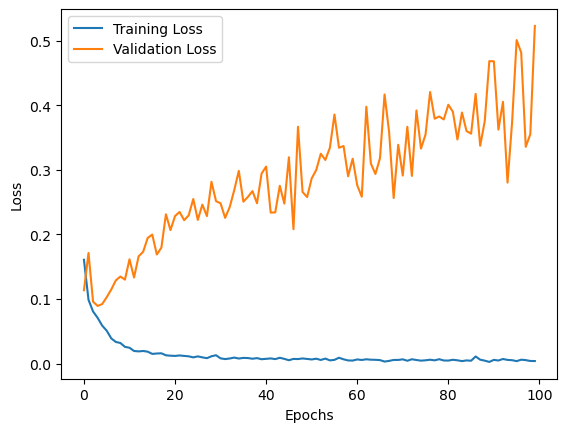

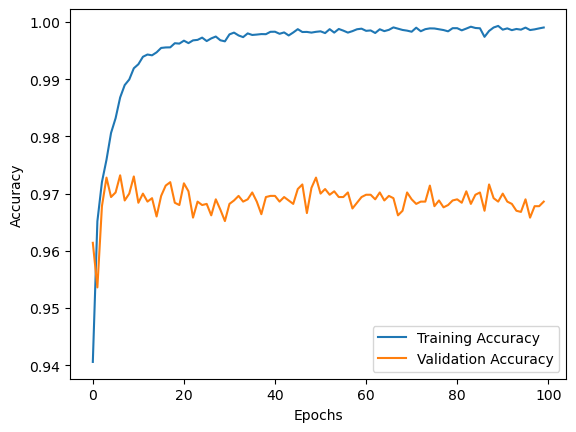

In [ ]:
# Tracer la courbe de perte
plt.plot(Loss, label='Training Loss')
plt.plot(Loss_val, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer la courbe d'accuracy
plt.plot(Acc, label='Training Accuracy')
plt.plot(Acc_val, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

D'après les résultats obtenus ci-dessus, le modèle à tendance à surapprendre après une dizaine d'époque. Cependant, cela ne nuit pas terriblement à la précision du modèle sur de nouvelles données, on observe surtout une hausse de la perte de validation ce qui indique que le modèle est moins sûr des prédictions qu'il fait. Dans ce cas précis, le modèle semble optimal avec un entrainement sur 4 époques.

On obtient en sortie un réseau de neurones entrainé sur 100 époques avec les performances associées. Ainsi le défaut de ce modèle n'est pas le nombre d'époque trop élevé (même si cela augmente le coût) car il nous permet d'observer la tendance d'apprentissage du modèle, le réel problème est de ne pas avoir implémenté un code permettant de sauvegarder automatiquement le meilleur modèle parmi les 100 différents ici (suivant les époques).

In [ ]:
label_map = train_dataset.class_to_idx

In [ ]:
data_transforms['val'] = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/validation/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['val'])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

In [ ]:
results_df

,name,prediction
0,S1076289446.jpg,0
1,S1077444077.jpg,0
2,S1077836286.jpg,0
3,S1078678567.jpg,0
4,S1079693161.jpg,1
...,...,...
4995,S705061467.jpg,1
4996,S740141003.jpg,1
4997,S766487455.jpg,1
4998,S979792929.jpg,1


In [ ]:
true_labels = []

for _, label in val_dataset:
    true_labels.append(label)

In [ ]:
df = pd.DataFrame({
    'name': [img_name for img_name, _ in val_dataset.imgs],  # Obtenir les noms d'images
    'prediction': predictions,  # Les prédictions que tu as déjà
    'true_label': true_labels   # Les vraies étiquettes
})

In [ ]:
df

,name,prediction,true_label
0,Data_Projet_1_Defi_IA/validation\other\S107628...,0,0
1,Data_Projet_1_Defi_IA/validation\other\S107744...,0,0
2,Data_Projet_1_Defi_IA/validation\other\S107783...,0,0
3,Data_Projet_1_Defi_IA/validation\other\S107867...,0,0
4,Data_Projet_1_Defi_IA/validation\other\S107969...,1,0
...,...,...,...
4995,Data_Projet_1_Defi_IA/validation\target\S70506...,1,1
4996,Data_Projet_1_Defi_IA/validation\target\S74014...,1,1
4997,Data_Projet_1_Defi_IA/validation\target\S76648...,1,1
4998,Data_Projet_1_Defi_IA/validation\target\S97979...,1,1


In [ ]:
predictions = np.array(predictions)
true_labels = np.array(true_labels)

errors = (predictions != true_labels).sum()/len(predictions)*100

print(f"Taux d'erreur: {errors:.2f}%")

Taux d'erreur: 3.14%


In [ ]:
# Définir la transformation pour les images de test
data_transforms['test'] = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/test/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['test'])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

# Sauvegarder le fichier dans le format souhaité : name;prediction
results_df.to_csv('predictions.csv', index=False, sep=';')

### Modèle 2

Pour ce modèle, nous refaisons le même que le modèle 1 sauf que cette fois nous allons implémenter le code permettant de conserver le meilleur modèle en sortie. Aussi, on ne va effectuer que 15 époques car nous avons vu avec les graphiques qu'il n'était pas nécessaire d'aller plus loin.

In [27]:
# Paramètres
nb_classes = 2
batch_size = 100
img_width = 128
img_height = 128

# Chemin d'accès aux données
data_dir = 'Data_Projet_1_Defi_IA'

# Définir les transformations pour normaliser les images
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((img_width, img_height)),  # Redimensionner les images
        transforms.ToTensor(),  # Convertir les images en tenseur PyTorch
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normaliser les images
    ]),
    'val': transforms.Compose([
        transforms.Resize((img_width, img_height)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Charger les ensembles d'entraînement et de validation
train_dataset = datasets.ImageFolder(data_dir + '/train', transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(data_dir + '/validation', transform=data_transforms['val'])

# Créer les DataLoaders pour charger les images par lots
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Obtenir les classes
class_names = train_dataset.classes
print(f"Classes: {class_names}")


Classes: ['other', 'target']


In [28]:
val_dataset

Dataset ImageFolder
    Number of datapoints: 5000
    Root location: Data_Projet_1_Defi_IA/validation
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [29]:
# Définition d'un réseau de neurones basique en PyTorch sans Softmax
class BasicModel(nn.Module):
    def __init__(self):
        super(BasicModel, self).__init__()
        # Couches de convolution
        # qui vont permettre de détecter la forme, les bords et les motifs un peu plus complexe
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Pooling pour réduire les dimensions
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dropout pour la régularisation
        self.dropout = nn.Dropout(0.5)

        # Couches entièrement connectées
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * (img_width // 8) * (img_height // 8), 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2) # Classification binaire

    def forward(self, x):
        # Bloc de convolutions + pooling + relu
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))

        # Aplatissement des caractéristiques
        x = self.flatten(x)

        # Couches entièrement connectées avec dropout
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Pas d'activation après la dernière couche pour obtenir les logits

        return x

# Instanciation du modèle
model = BasicModel()

# Optimiseur Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Définir la fonction de perte avec CrossEntropyLoss (elle inclut Softmax)
criterion = nn.CrossEntropyLoss()

# Affichage de la structure du modèle
print(model)

BasicModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


In [30]:
# Déterminer si on utilise le GPU ou le CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialiser le modèle et le transférer sur le GPU si disponible
model = BasicModel().to(device)

# Définir l'optimiseur après avoir déplacé le modèle sur le GPU
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Définir la fonction de perte et la transférer sur le GPU
criterion = nn.CrossEntropyLoss().to(device)

# Taille des batchs et nombre d'epochs
epochs = 15 # paramètre qu'il faut optimiser

# Variables pour sauvegarder les meilleures performances
best_acc = 0.0
best_model_params_path = 'best_model_params.pt'

# Listes pour stocker les valeurs de perte et d'accuracy pour affichage
Loss,Loss_val = [],[]
Acc,Acc_val = [],[]

# Boucle d'entraînement
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    model.train()  # Mettre le modèle en mode entraînement
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # Transférer les données sur le GPU de manière automatique
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Réinitialiser les gradients

        # Propagation avant (forward pass)
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Propagation arrière (backward pass) et mise à jour des poids
        loss.backward()
        optimizer.step()

        # Suivi de la perte et de la précision
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Afficher la perte et l'accuracy pour cette époque
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    Loss.append(epoch_loss)
    Acc.append(epoch_acc)
    #print(f"Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # Validation
    model.eval()  # Mettre le modèle en mode évaluation
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Désactiver la propagation des gradients
        for images, labels in val_loader:
            # Transférer les données de validation sur le GPU
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    # Afficher les résultats de validation
    val_epoch_loss = val_loss / len(val_loader)
    val_epoch_acc = val_correct / val_total
    Loss_val.append(val_epoch_loss)
    Acc_val.append(val_epoch_acc)
    print(f"Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}")
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")
    print()
    # Sauvegarder le modèle si la précision de validation est la meilleure
    if val_epoch_acc > best_acc:
        best_acc = val_epoch_acc
        torch.save(model.state_dict(), best_model_params_path)

# Charger les meilleurs poids
model.load_state_dict(torch.load(best_model_params_path))
print("Best model loaded with validation accuracy:", best_acc)

Using device: cpu
Epoch 1/15
Training Loss: 0.1693, Training Accuracy: 0.9369
Validation Loss: 0.1048, Validation Accuracy: 0.9610

Epoch 2/15
Training Loss: 0.1000, Training Accuracy: 0.9652
Validation Loss: 0.0983, Validation Accuracy: 0.9668

Epoch 3/15
Training Loss: 0.0854, Training Accuracy: 0.9706
Validation Loss: 0.0936, Validation Accuracy: 0.9694

Epoch 4/15
Training Loss: 0.0718, Training Accuracy: 0.9748
Validation Loss: 0.0865, Validation Accuracy: 0.9714

Epoch 5/15
Training Loss: 0.0609, Training Accuracy: 0.9790
Validation Loss: 0.0942, Validation Accuracy: 0.9720

Epoch 6/15
Training Loss: 0.0495, Training Accuracy: 0.9832
Validation Loss: 0.1107, Validation Accuracy: 0.9702

Epoch 7/15
Training Loss: 0.0425, Training Accuracy: 0.9859
Validation Loss: 0.0985, Validation Accuracy: 0.9724

Epoch 8/15
Training Loss: 0.0383, Training Accuracy: 0.9881
Validation Loss: 0.1216, Validation Accuracy: 0.9692

Epoch 9/15
Training Loss: 0.0312, Training Accuracy: 0.9900
Validation

C:\Users\becha\AppData\Local\Temp\ipykernel_16052\3109732021.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


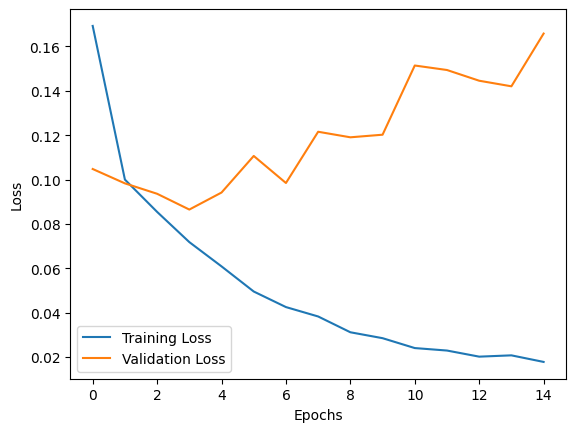

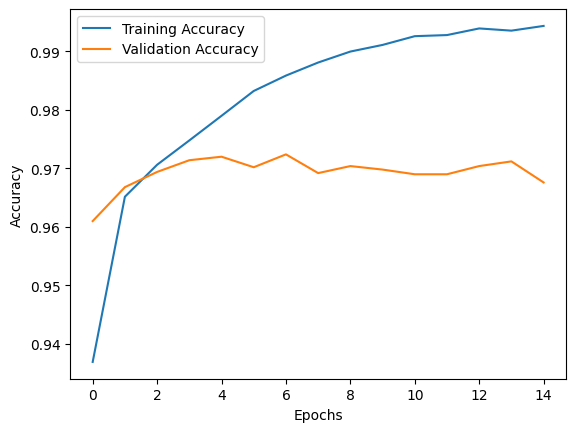

In [31]:
# Tracer la courbe de perte
plt.plot(Loss, label='Training Loss')
plt.plot(Loss_val, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer la courbe d'accuracy
plt.plot(Acc, label='Training Accuracy')
plt.plot(Acc_val, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
label_map = train_dataset.class_to_idx

In [33]:
data_transforms['val'] = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/validation/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['val'])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

In [34]:
results_df

,name,prediction
0,S1076289446.jpg,0
1,S1077444077.jpg,0
2,S1077836286.jpg,0
3,S1078678567.jpg,0
4,S1079693161.jpg,1
...,...,...
4995,S705061467.jpg,1
4996,S740141003.jpg,1
4997,S766487455.jpg,1
4998,S979792929.jpg,1


In [35]:
true_labels = []

for _, label in val_dataset:
    true_labels.append(label)

In [36]:
df = pd.DataFrame({
    'name': [img_name for img_name, _ in val_dataset.imgs],  # Obtenir les noms d'images
    'prediction': predictions,  # Les prédictions que tu as déjà
    'true_label': true_labels   # Les vraies étiquettes
})

In [37]:
df

,name,prediction,true_label
0,Data_Projet_1_Defi_IA/validation\other\S107628...,0,0
1,Data_Projet_1_Defi_IA/validation\other\S107744...,0,0
2,Data_Projet_1_Defi_IA/validation\other\S107783...,0,0
3,Data_Projet_1_Defi_IA/validation\other\S107867...,0,0
4,Data_Projet_1_Defi_IA/validation\other\S107969...,1,0
...,...,...,...
4995,Data_Projet_1_Defi_IA/validation\target\S70506...,1,1
4996,Data_Projet_1_Defi_IA/validation\target\S74014...,1,1
4997,Data_Projet_1_Defi_IA/validation\target\S76648...,1,1
4998,Data_Projet_1_Defi_IA/validation\target\S97979...,1,1


In [38]:
predictions = np.array(predictions)
true_labels = np.array(true_labels)

errors = (predictions != true_labels).sum()/len(predictions)*100

print(f"Taux d'erreur: {errors:.2f}%")

Taux d'erreur: 2.76%


In [39]:
# Définir la transformation pour les images de test
data_transforms['test'] = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/test/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['test'])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

# Sauvegarder le fichier dans le format souhaité : name;prediction
results_df.to_csv('predictions_modele2.csv', index=False, sep=';')

Avec ce modèle, on obtient effectivement de bien meilleures performances : 2.76% d'erreur sur les données de validation contre 3.14% avec le modèle 1.

### Modèles 3/4/5/6 : Finetuning

Dans les prochains modèles, nous effectuerons du FineTuning en utilisant les modèles déjà pré-entrainés comme ResNet-18, ResNet-50 et EfficientNetB7 connus pour être particulièrement efficaces parmis les CNN.

In [40]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(100),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(100),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'Data_Projet_1_Defi_IA'
#data_dir = 'Small'
#data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Projet_1_Defi_IA'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'validation']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=128,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'validation']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'validation']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [41]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        # Lists to store loss and accuracy values for plotting
        train_loss_values = []
        val_loss_values = []
        train_acc_values = []
        val_acc_values = []

        for epoch in range(num_epochs):
            print(f'Epoch {epoch+1}/{num_epochs}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'validation']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # Store loss and accuracy for plotting
                if phase == 'train':
                    train_loss_values.append(epoch_loss)
                    train_acc_values.append(epoch_acc.item())
                else:
                    val_loss_values.append(epoch_loss)
                    val_acc_values.append(epoch_acc.item())

                # deep copy the model
                if phase == 'validation' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))

        # Plot the loss and accuracy curves
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

        # Plotting loss on the first subplot
        ax1.plot(train_loss_values, label='Training Loss')
        ax1.plot(val_loss_values, label='Validation Loss')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.set_title('Loss Curve')

        # Plotting accuracy on the second subplot
        ax2.plot(train_acc_values, label='Training Accuracy')
        ax2.plot(val_acc_values, label='Validation Accuracy')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.set_title('Accuracy Curve')

        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()

    return model

### Modèle 3 : ResNet-18

In [5]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001, weight_decay=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

Epoch 1/15
----------
train Loss: 0.2104 Acc: 0.9179
validation Loss: 0.0982 Acc: 0.9634

Epoch 2/15
----------
train Loss: 0.1827 Acc: 0.9295
validation Loss: 0.0903 Acc: 0.9666

Epoch 3/15
----------
train Loss: 0.1821 Acc: 0.9304
validation Loss: 0.0960 Acc: 0.9660

Epoch 4/15
----------
train Loss: 0.1812 Acc: 0.9298
validation Loss: 0.1174 Acc: 0.9576

Epoch 5/15
----------
train Loss: 0.1738 Acc: 0.9337
validation Loss: 0.0883 Acc: 0.9658

Epoch 6/15
----------
train Loss: 0.1501 Acc: 0.9422
validation Loss: 0.0722 Acc: 0.9754

Epoch 7/15
----------
train Loss: 0.1486 Acc: 0.9430
validation Loss: 0.0732 Acc: 0.9738

Epoch 8/15
----------
train Loss: 0.1409 Acc: 0.9459
validation Loss: 0.0727 Acc: 0.9732

Epoch 9/15
----------
train Loss: 0.1401 Acc: 0.9468
validation Loss: 0.0720 Acc: 0.9742

Epoch 10/15
----------
train Loss: 0.1422 Acc: 0.9458
validation Loss: 0.0709 Acc: 0.9752

Epoch 11/15
----------
train Loss: 0.1321 Acc: 0.9503
validation Loss: 0.0694 Acc: 0.9752

Epoch 12

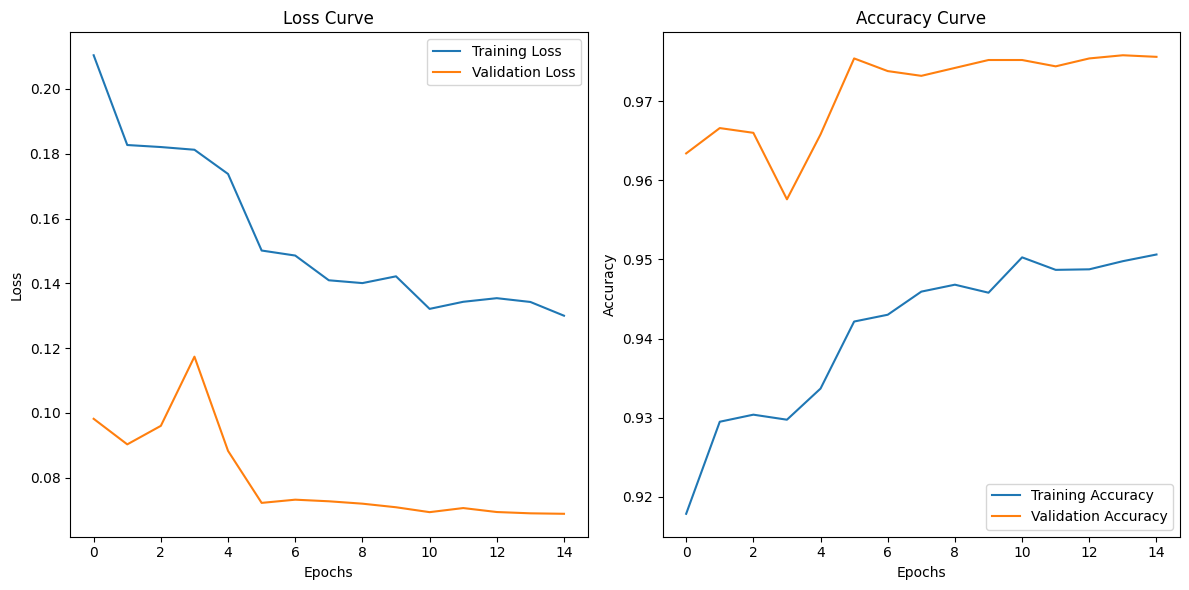

In [6]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

Après 15 époques, le modèle ne semble pas surapprendre et suggère qu'on aurait pu continuer l'entrainement.

In [7]:
data_transforms['validation'] = transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(100),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/validation/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['validation'])
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model_ft.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

In [8]:
results_df

,name,prediction
0,S1076289446.jpg,0
1,S1077444077.jpg,0
2,S1077836286.jpg,0
3,S1078678567.jpg,0
4,S1079693161.jpg,1
...,...,...
4995,S705061467.jpg,1
4996,S740141003.jpg,1
4997,S766487455.jpg,1
4998,S979792929.jpg,1


In [9]:
true_labels = []

for _, label in dataloaders['validation'].dataset:
    true_labels.append(label)

In [10]:
df = pd.DataFrame({
    'name': [img_name for img_name, _ in dataloaders['validation'].dataset.imgs],  # Obtenir les noms d'images
    'prediction': predictions,  # Les prédictions que tu as déjà
    'true_label': true_labels   # Les vraies étiquettes
})

In [11]:
df

,name,prediction,true_label
0,Data_Projet_1_Defi_IA\validation\other\S107628...,0,0
1,Data_Projet_1_Defi_IA\validation\other\S107744...,0,0
2,Data_Projet_1_Defi_IA\validation\other\S107783...,0,0
3,Data_Projet_1_Defi_IA\validation\other\S107867...,0,0
4,Data_Projet_1_Defi_IA\validation\other\S107969...,1,0
...,...,...,...
4995,Data_Projet_1_Defi_IA\validation\target\S70506...,1,1
4996,Data_Projet_1_Defi_IA\validation\target\S74014...,1,1
4997,Data_Projet_1_Defi_IA\validation\target\S76648...,1,1
4998,Data_Projet_1_Defi_IA\validation\target\S97979...,1,1


In [12]:
predictions = np.array(predictions)
true_labels = np.array(true_labels)

errors = (predictions != true_labels).sum()/len(predictions)*100

print(f"Taux d'erreur: {errors:.2f}%")

Taux d'erreur: 2.42%


In [13]:
# Définir la transformation pour les images de test
data_transforms['test'] = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/test/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['test'])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model_ft.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

# Sauvegarder le fichier dans le format souhaité : name;prediction
results_df.to_csv('predictions_resnet18.csv', index=False, sep=';')

### Modèle 4 : ResNet-50

In [14]:
model_ft = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001, weight_decay=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

Epoch 1/15
----------
train Loss: 0.2004 Acc: 0.9230
validation Loss: 0.1119 Acc: 0.9636

Epoch 2/15
----------
train Loss: 0.1837 Acc: 0.9309
validation Loss: 0.1206 Acc: 0.9566

Epoch 3/15
----------
train Loss: 0.1778 Acc: 0.9325
validation Loss: 0.1178 Acc: 0.9604

Epoch 4/15
----------
train Loss: 0.1753 Acc: 0.9330
validation Loss: 0.1000 Acc: 0.9648

Epoch 5/15
----------
train Loss: 0.1736 Acc: 0.9345
validation Loss: 0.0935 Acc: 0.9686

Epoch 6/15
----------
train Loss: 0.1493 Acc: 0.9428
validation Loss: 0.0745 Acc: 0.9746

Epoch 7/15
----------
train Loss: 0.1426 Acc: 0.9460
validation Loss: 0.0682 Acc: 0.9778

Epoch 8/15
----------
train Loss: 0.1408 Acc: 0.9450
validation Loss: 0.0670 Acc: 0.9776

Epoch 9/15
----------
train Loss: 0.1385 Acc: 0.9475
validation Loss: 0.0678 Acc: 0.9762

Epoch 10/15
----------
train Loss: 0.1371 Acc: 0.9481
validation Loss: 0.0647 Acc: 0.9764

Epoch 11/15
----------
train Loss: 0.1294 Acc: 0.9503
validation Loss: 0.0634 Acc: 0.9786

Epoch 12

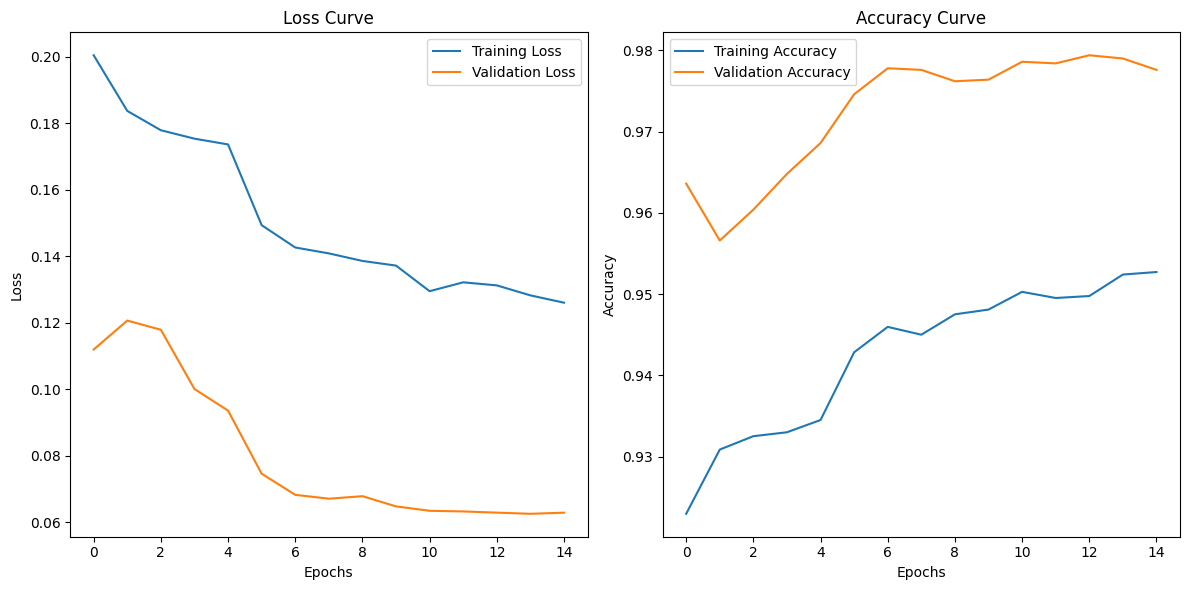

In [15]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

Encore une fois, après 15 époques, le modèle ne semble pas surapprendre et suggère qu'on aurait pu continuer l'entrainement.

In [16]:
data_transforms['validation'] = transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(100),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/validation/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['validation'])
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model_ft.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

In [17]:
results_df

,name,prediction
0,S1076289446.jpg,0
1,S1077444077.jpg,0
2,S1077836286.jpg,0
3,S1078678567.jpg,0
4,S1079693161.jpg,1
...,...,...
4995,S705061467.jpg,1
4996,S740141003.jpg,1
4997,S766487455.jpg,1
4998,S979792929.jpg,1


In [18]:
true_labels = []

for _, label in dataloaders['validation'].dataset:
    true_labels.append(label)

In [19]:
df = pd.DataFrame({
    'name': [img_name for img_name, _ in dataloaders['validation'].dataset.imgs],  # Obtenir les noms d'images
    'prediction': predictions,  # Les prédictions que tu as déjà
    'true_label': true_labels   # Les vraies étiquettes
})

In [20]:
df

,name,prediction,true_label
0,Data_Projet_1_Defi_IA\validation\other\S107628...,0,0
1,Data_Projet_1_Defi_IA\validation\other\S107744...,0,0
2,Data_Projet_1_Defi_IA\validation\other\S107783...,0,0
3,Data_Projet_1_Defi_IA\validation\other\S107867...,0,0
4,Data_Projet_1_Defi_IA\validation\other\S107969...,1,0
...,...,...,...
4995,Data_Projet_1_Defi_IA\validation\target\S70506...,1,1
4996,Data_Projet_1_Defi_IA\validation\target\S74014...,1,1
4997,Data_Projet_1_Defi_IA\validation\target\S76648...,1,1
4998,Data_Projet_1_Defi_IA\validation\target\S97979...,1,1


In [21]:
predictions = np.array(predictions)
true_labels = np.array(true_labels)

errors = (predictions != true_labels).sum()/len(predictions)*100

print(f"Taux d'erreur: {errors:.2f}%")

Taux d'erreur: 2.06%


In [22]:
# Définir la transformation pour les images de test
data_transforms['test'] = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/test/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['test'])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model_ft.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

# Sauvegarder le fichier dans le format souhaité : name;prediction
results_df.to_csv('predictions_resnet50.csv', index=False, sep=';')

### Modèle 5 : EfficientNetB7

In [23]:
# Charger EfficientNetB7
model_ft = models.efficientnet_b7(weights=models.EfficientNet_B7_Weights.DEFAULT)

# Remplacer la dernière couche pour correspondre au nombre de classes
num_ftrs = model_ft.classifier[1].in_features  # Nombre d'entrées pour la dernière couche
model_ft.classifier[1] = nn.Linear(num_ftrs, 2)  # 2 classes

# Déplacer le modèle sur le GPU si disponible
model_ft = model_ft.to(device)

# Définir la fonction de perte (loss function)
criterion = nn.CrossEntropyLoss()

# Optimiseur (Adam)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001, weight_decay=0.0001)

# Scheduler pour réduire le taux d'apprentissage
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

In [24]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

Epoch 1/15
----------
train Loss: 0.1852 Acc: 0.9278
validation Loss: 0.1743 Acc: 0.9520

Epoch 2/15
----------
train Loss: 0.1632 Acc: 0.9373
validation Loss: 0.5554 Acc: 0.7092

Epoch 3/15
----------
train Loss: 0.1582 Acc: 0.9398
validation Loss: 0.1458 Acc: 0.9528

Epoch 4/15
----------
train Loss: 0.1599 Acc: 0.9392
validation Loss: 0.2299 Acc: 0.9264

Epoch 5/15
----------
train Loss: 0.1626 Acc: 0.9378
validation Loss: 0.1671 Acc: 0.9392

Epoch 6/15
----------


KeyboardInterrupt: 

Nous avons stoppé l'entrainement du modèle car trop long, il était à l'époque 5/15 au bout de 6 heures et ne produisait pas des résultats remarquables par rapport aux autres.

### Modèle 6 : ResNet-50 gélé

Nous avons tenté de geler les couches et d'apprendre seulement sur la dernière.

In [42]:
model_conv = torchvision.models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
#optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
optimizer_conv = optim.Adam(model_conv.fc.parameters(), lr=0.001, weight_decay=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=5, gamma=0.1)

Epoch 1/15
----------
train Loss: 0.3159 Acc: 0.8676
validation Loss: 0.2257 Acc: 0.9092

Epoch 2/15
----------
train Loss: 0.2762 Acc: 0.8857
validation Loss: 0.2049 Acc: 0.9184

Epoch 3/15
----------
train Loss: 0.2723 Acc: 0.8871
validation Loss: 0.1929 Acc: 0.9248

Epoch 4/15
----------
train Loss: 0.2710 Acc: 0.8868
validation Loss: 0.2009 Acc: 0.9230

Epoch 5/15
----------
train Loss: 0.2674 Acc: 0.8894
validation Loss: 0.1942 Acc: 0.9254

Epoch 6/15
----------
train Loss: 0.2650 Acc: 0.8901
validation Loss: 0.1962 Acc: 0.9216

Epoch 7/15
----------
train Loss: 0.2630 Acc: 0.8922
validation Loss: 0.1951 Acc: 0.9226

Epoch 8/15
----------
train Loss: 0.2626 Acc: 0.8918
validation Loss: 0.1974 Acc: 0.9204

Epoch 9/15
----------
train Loss: 0.2645 Acc: 0.8924
validation Loss: 0.1941 Acc: 0.9238

Epoch 10/15
----------
train Loss: 0.2611 Acc: 0.8931
validation Loss: 0.2000 Acc: 0.9192

Epoch 11/15
----------
train Loss: 0.2623 Acc: 0.8915
validation Loss: 0.1952 Acc: 0.9236

Epoch 12

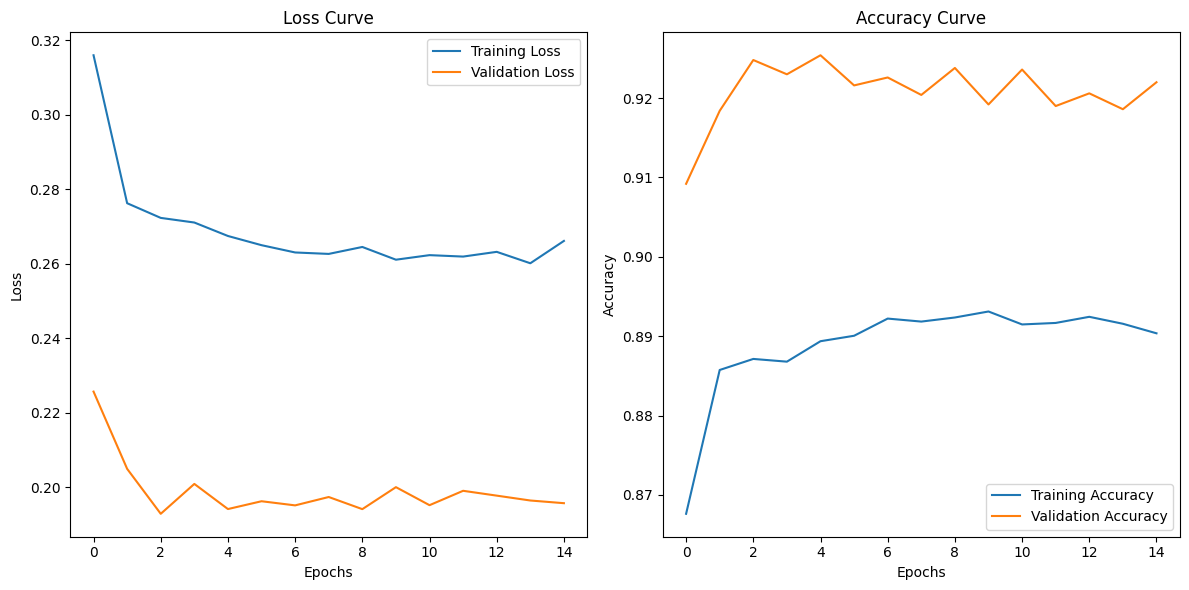

In [43]:
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=15)

Le réseau ne semble pas s'améliorer au cours des époques. On remarque qu'il est bien moins performant que sa version non gelé, on perd environ 5% de précision.

In [45]:
data_transforms['validation'] = transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(100),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/validation/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['validation'])
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model_conv.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model_conv(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

In [46]:
results_df

,name,prediction
0,S1076289446.jpg,0
1,S1077444077.jpg,0
2,S1077836286.jpg,0
3,S1078678567.jpg,0
4,S1079693161.jpg,1
...,...,...
4995,S705061467.jpg,1
4996,S740141003.jpg,1
4997,S766487455.jpg,1
4998,S979792929.jpg,1


In [47]:
true_labels = []

for _, label in dataloaders['validation'].dataset:
    true_labels.append(label)

In [48]:
df = pd.DataFrame({
    'name': [img_name for img_name, _ in dataloaders['validation'].dataset.imgs],  # Obtenir les noms d'images
    'prediction': predictions,  # Les prédictions que tu as déjà
    'true_label': true_labels   # Les vraies étiquettes
})

In [49]:
df

,name,prediction,true_label
0,Data_Projet_1_Defi_IA\validation\other\S107628...,0,0
1,Data_Projet_1_Defi_IA\validation\other\S107744...,0,0
2,Data_Projet_1_Defi_IA\validation\other\S107783...,0,0
3,Data_Projet_1_Defi_IA\validation\other\S107867...,0,0
4,Data_Projet_1_Defi_IA\validation\other\S107969...,1,0
...,...,...,...
4995,Data_Projet_1_Defi_IA\validation\target\S70506...,1,1
4996,Data_Projet_1_Defi_IA\validation\target\S74014...,1,1
4997,Data_Projet_1_Defi_IA\validation\target\S76648...,1,1
4998,Data_Projet_1_Defi_IA\validation\target\S97979...,1,1


In [50]:
predictions = np.array(predictions)
true_labels = np.array(true_labels)

errors = (predictions != true_labels).sum()/len(predictions)*100

print(f"Taux d'erreur: {errors:.2f}%")

Taux d'erreur: 7.46%


In [51]:
# Définir la transformation pour les images de test
data_transforms['test'] = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/test/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['test'])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model_conv.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model_conv(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

# Sauvegarder le fichier dans le format souhaité : name;prediction
results_df.to_csv('predictions_resnet50_frozen.csv', index=False, sep=';')

## Conclusion

Finalement, sur les données de validation, on obtient les résultats suivants :

- Modèle 1 : 52,31% de perte et 3,14% d'erreur de prédiction.

- Modèle 2 : 9,85% de perte et 2,76% d'erreur de prédiction.

- Modèle 3 (ResNet-18) : 6,90% de perte et 2,42% d'erreur de prédiction.

- Modèle 4 (ResNet-50) : 6,28% de perte et 2,06% d'erreur de prédiction.

- Modèle 5 (EfficientNetB7) : INCONNU

- Modèle 6 (ResNet-50 gelé) : 19,42% de perte et 7,46% d'erreur de prédiction.

Ainsi, le modèle le plus performant est en tout point le modèle 4 (ResNet-50) qui n'effectue que 2,06% d'erreur de prédiction sur nos données de validation et qui est plutôt sûr de ses prédictions avec une perte de seulement 6,28%. \
C'est également le modèle le plus complexe et le plus coûteux dont nous pouvons comparer les résultats.

Le modèle 3 (ResNet-18), moins complexe et moins coûteux s'en sort très bien également en le suivant de près. Son avantage par rapport au modèle 4 est son temps de calcul bien moindre pour des résultats satisfaisants.

Quant au modèle 2 entièrement entrainé par nos soins, il talonne de près les modèles pré-entrainés sur des millions de données ce qui s'avère être remarquable tout en possédant une plus faible complexité.

Viennent ensuite les modèles 1 et 6 (ResNet-50 gelé) qui sont à éviter, le modèle 1 étant trop instable dans ses prédictions dû à une perte élevée et le modèle 6 étant peu performant par rapport aux autres bien que convenable.